# Action Recognition
### Utilizing YGAR Dataset

##### Shuo Wang, Amiya Ranjan and Lawrence Jiang
##### DATASCI 281 Computer Vision

## Abstract

The scarcity of high quality actions video data is a bottleneck in the research and application of action recognition. Although significant effort has been made in this area, there still exist gaps in the range of available data types in which a more flexible and comprehensive data set could help bridge. In this paper, we present a new process of 3-D actions data simulation engine and generate 3 sets of sample data to demonstrate its current functionalities. With the new data generation process, we demonstrate its applications to image classifications, action recognitions and potential to evolution into a system that would allow the exploration of much more complex action recognition tasks. In order to show off these capabilities, we also train and test a list of commonly used models for image recognition to demonstrate the potential applications and capabilities of the data sets and their generation process. 

## Introduction

Action recognition is an important area of research within the field of machine learning. Potential applications of movement recognition and understanding of human actions are endless, ranging from robotics and security surveillance to human-machine interactions. Successful progress in this field would translate to solutions for many real-world problems. Not only are the potentials enormous, diverse distinct research topics exist within the broad category of action recognition. Single action classification is one of the more widely studied topics, and shares many similar techniques to image classification. Moving beyond single actions, localized multiple object action recognition are also possible. Even sequential action recognition has been attempted. Although tremendous progress has been made, much still remains to be done. Some of the obstacles facing the research efforts include: relative scarcity of high quality data, high resource requirements for training potential model architectures and difficulty in the processing and modification of input data for analysis.

In this paper, we propose a new method of video actions data generation by means of 3D simulation, where data generation could be customized to facilitate various research goals and specific areas of focus, including single action recogition, action orientation detection and action sequence segmentation, to name a few. In addition, we also perform several tests of action recognition using classic image classification modeling techniques and deep learning techniques, demonstrating how our dataset could be leveraged to bridge the gap between image classification tasks and 3D action recognition.

## Background

### Dataset

Several data sets exist currently for single action recognition, including UCF101 and HMDB. UCF101 dataset is a collection of youtube videos that contains 101 action categories with a total of 13320 videos, averaging 132 videos per category. Some of the categories in the dataset include "Apply Eye Makeup", "archery" and "Frisbee catch".

HMDB is another data set that aims to further the progress in understanding action recognition.  It contains 51 actions and a total of 7000 vidoe clips. The actions within the videos are broadly categorized into five types: general facial actions, facial actions with object manipulation, general body movements, body movements with object interaction and body movements for human interaction.

Over time, larger data sets have been created for video action recognition tasks such as the kinetics dataset, where 700 classes of actions have been categoried, each with an average of 926 sample videos.

More recently, spatio-temporally localized atomic visual actions data sets (AVA) have also been introduced, where actions by multiple objects exist within the same video sample.Over time, larger data sets have been created for video action recognition tasks such as the kinetics dataset\cite{Smaira:2020qr}, where 700 classes of actions have been categoried, each with an average of 926 sample videos.

More recently, spatio-temporally localized atomic visual actions data sets (AVA) have also been introduced, where actions by multiple objects exist within the same video sample.

### Action Recognition

As more and more data sets come into existence, models have been built to train and test on these data sets, including convolutional neural network, LSTM based encoder models and 3D neural networks that combines frames and optical flow information. More complex architectures for localized action recognitions have also been proposed.

### Bottlenecks

Although commendable progress has been made in the research of action understanding, many issues still hinder its progress. One of them is the quality of available data sets. The existing data sets are typically collected from video data sources and curated by human judges, this process introduces many variabilities in the quality and comprehensiveness of the sample data, and because these data are collected as they are available, often it is impossible to control for characteristics that are desired for particular research objectiveness. For example, it is often difficult to study the specific effects of object variation and orientation separately. Besides targeted research needs, it is often difficult to study hierarchies of categories. As an example, if we would like to conduct a research where we would like to first recognize the person in the image, and then the action performed by the person, then it would be very difficult to conduct such studies with the existing data sets.

The second issue is the quantity of available data, although kinetics data set has attempted to address the issue of volume with larger number of samples, they are still only single action samples of variable qualities, making studies of localized actions and sequential action recogniton difficult.

We hope that our new data set could help address some of these issues and contribute to the progress of the study in action recognition.

## Data

### Data Generation

Our data set is generated by a 3D simulation program developed in Unity that supports configurations for zoom, center offset, camera angle orientation and avatar styles. The amount of zoom applied to the camera typically varies from 50% to 200%, 100% represents the default zoom amount. An offset could be applied to the x or y direction of the the camera relative to the target of the camera, the unit of this configuration is based on the simulation world space metric system (meters in world space).  The camera could also be rotated about the x and y axis relative to the target avatar, we typically set these configurations between -5 degrees to 90 degrees about the x axis and -90 degrees to 90 degrees about the y axis.


In [28]:
from nebula.common import display_color
import matplotlib.pyplot as plt
import cv2

def display_img(path):
    img = cv2.imread(path)
    display_color(img)

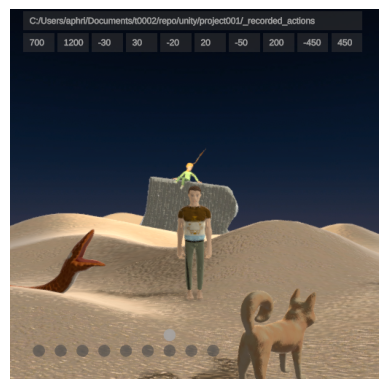

In [7]:
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/simulation_engine.png")

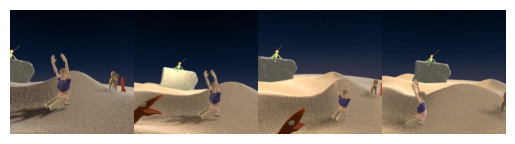

In [8]:
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/orientation_fig.png")

The avatar character in the simulation could be configured with various hair, cloth and pants style. In our current iteration, there are 4 different styles for hair, cloth and pants respectively, for a total of 64 unique combinations.

Our first set of actions include a total of 10 different yoga poses: camel, chair, childs, lord of the dance, lotus, thunderbolt, triangle, upward dog, warrior II and warrior III. Each of the 10 yoga poses have 4 type variations within them, some with more pronounced difference than others,  for a total of 40 action and action types. We have decided to choose this set of actions as our first action sets because each pose is distinct and has a defined ending position, which allows us to use image classification techniques to compare classic modeling architecture and deep learning ones.

Our simulation also supports the option to include static background and dynamic background objects which would allow us to adjust the complexity of the sample data.


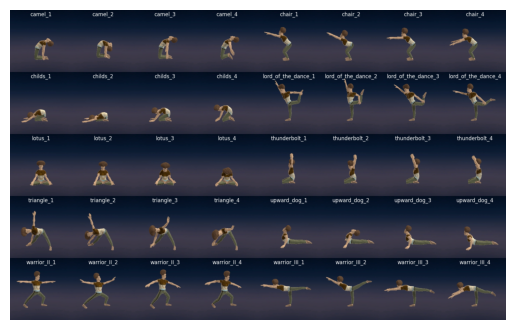

In [10]:
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/actions_fig.png")

### Data Set

From the actions and configurations available within our simulation program, we generated 3 sets of video actions data of varying difficulties based on the zoom, offset, angle and scene background configurations specified: easy, medium and hard.

The configurations of the three datasets are listed in the Table below.

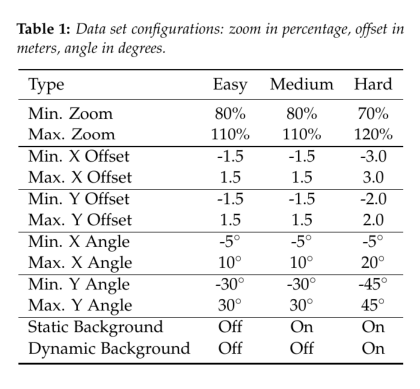

In [12]:
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/table_data_set_3_levels.png")

Each dataset is generated as follows: for each of the 40 action and action types, we sample 25 random hair, cloth and pants style combinations to create action scenes for, and for each action scene, we capture the action with 20 cameras of randomly generated offsets and angles based on the constraints specified. Each dataset is therefore consisted of 20,000 videos, every action and action type label combination contains 500 videos and every action label contains 2000 videos. Figure below shows samples from each difficulty level.

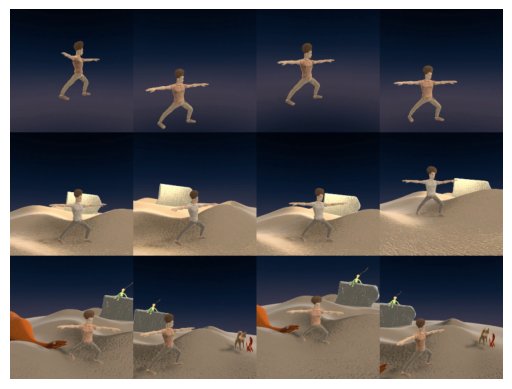

In [13]:
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/difficulty_levels.png")

As we can see from table above, the configuration of easy and medium dataset is identical except medium dataset has static background turned on.

Each video is typically about 1 second in length, sampled at 30 FPS. the size of each video is around 80KB and the frame is 351X351 pixels.

## Model

Before creating models for the data sets, we have extracted the frame at 50\% location of each video as input to our models, since the actions within each video are yoga poses and could be adequately represented by the middle frame. This approach would ideally be enhanced later to use multiple frames within each video, supplemented with temporal information represented by optical flow.

Each frame was extracted from the video as 256X256X3 pixel RBG image, then converted to grayscale image of 256X256 pixels. Afterwards, we cropped top, bottom, left and right of each grayscale image by 70, 30, 50 and 50 pixels to create 156X156 pixels grayscale image, in order to further reduce the size of input data.

### Filter

#### Principal Component Analysis

For computing PCA, we first downsized the input grayscale frame by 50\% to 78X78 pixels and flatten the image into an array of length 6084. Then we applied PCA on the input array, keeping the top 256 principal components. Finally each of the image array was projected onto the top 256 components to create the PCA weights for each image.

#### Histogram of Oriented Gradients

In order to compute the HOG features, we first cropped the input grayscale image to 100X100 pixels, due to the amount of time HOG computation required. Then HOG feature descriptor was computed with 9 orientations, 2x2 pixels per cell and 2x2 cells per block. Figure below shows the results of the filter applied to images of different difficulty levels. From the sample image, it's clear that HOG filtered images are best for images without much structures in the background. As the complexity of the background increases, the HOG features of the avatar become less distinguishable .

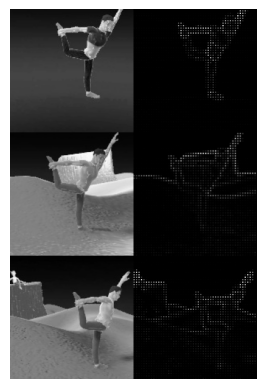

In [17]:
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/hog_images.png")

#### Scale-Invariant feature transform \& K-Mean Cluster

Bag of words is a commonly used technique in image classification. Similar to NLP, image features are used as words. We utilized SIFT features for this purpose. SIFT is one of the important algorithms that detect objects irrelevant to the scale and rotation of the image and the reference. This helps greatly when we are comparing real-world objects to an image because the features extracted are independent of the angle and scale of the image. Figure below shows an example of how features from one image could be mapped to another image even when the objects in the image have different orientations. We used OpenCV to extract SIFT descriptors for each image. The descriptors were group into N (N=60) clusters. Then a feature vector $v \in \mathbb{R}^n $   was built where each direction represented a cluster and magnitude represented the count of SIFT descriptors in that cluster for the image.

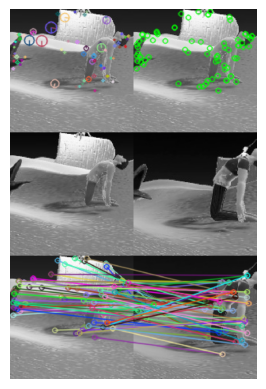

In [18]:
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/sift_res.png")

### Classifier

#### Support Vector Machine

We used the support vector classification directly from Scikit-Learn with the default parameters: 1.0 for regularization, radial basis function as kernel and maximum iterations of 50. 

#### Logistic Regression

Again we used the logistic regression function from Scikit-Learn with default parameters: "LBFGS" as the solver and maximum iterations of 100.

#### Gradient Boosting Tree

 The gradient boosting tree we trained used 100 estimators, each with a maximum depth of 3 and a learning rate of 0.1.

#### Convolutional Neural Network

Our convolutional neural network model was inspired by the VGG-16 CNN model. The model consisted of 10 convolutional layers, where the first two layers extracted 32 features and subequent pairs of layers extracted double the number of features from the previous layers. After each pair of layers, a max pooling of size 2X2 was applied to the input features from the previous convolutional layers. Finally, two dense layers followed by a classification layer were applied to generate the model prediction. 

## Evaluation

### Baseline

Our baseline for evaluation was the SVM model trained on the unfiltered input data scaled down to 20\% at the "easy" level. We felt that this model was the most natural starting point to evaluate how effective the various types of filtering and modeling techniques were and how much they contributed to the final accuracy of the models.

### Process

We started out by training our baseline models on the "easy" level data set, which produced a guideline for choosing models for further training. Then combinations of filters and models with the best results were trained on the "medium" level data set to assess the capabilities of the models. Finally the best performance models were challenged with the "hard" data set for evaluation.

For every data set and model training, we splitted the sample data into three sets: training set, validation set and test set, in the ratio of 8:1:1. For classic models, validation data set was not used at all, training set was used to train and optionally validate during training depending on the model in question (GBT), and test data set was used to compute the final accuracy of the models.

## Results

Table below showed the results from training and testing combinations of 4 models and 3 filters. We started out with the easy level data set, training 3 models (SVM, Logistic, GBT) with no filters except downsizing the input images by a further 80\%. The results showed that gradient boosting tree generates the best performance out of the three models. However the results of SVM and GBT were comparable with action and action type label combinations. Three more sets of models were trained on the easy level data set with the PCA filter, the HOG plus PCA filter combination and the SIFT filter. The results showed steady improvements, where HOG plus PCA filter with SVM model achieving the best accuracy for action plus action type labels, although the SIFT filtered models performed better on average.

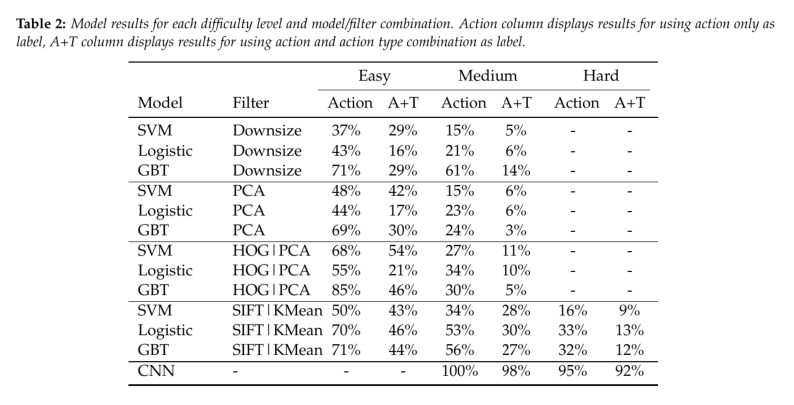

In [36]:
plt.figure(figsize=(10, 20))
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/table_results.png")

For the medium set, again we performed the same training and testing for all of the classic models, but this time also including the CNN model. As shown in the table, the CNN model easily outperformed all other models, achieving 98\% accuracy on the action plus action type labels. Second best performing models were the SIFT feature based models, achieving 28\% accuracy on average for action plus action type labels. Looking at the data, a general trend appeared: SIFT filtered models generally performed better. This was not surprising, because one of the key variations in our samples was the orientation of cameras, SIFT features would be able to reduce the complexity due to these variations to a great extent.

Finally, We took the best performing models on medium data set and applied them to the hard data set(retraining on hard data set). The results showed that CNN model still vastly outperformed other models, the SIFT feature models performed moderately well on the action only labels, but faltered when trying to predict the action plus action type labels.

## Model Analysis

### Hyperparameter Search

Although CNN model produced superior performance by a large margin, The models with SIFT plus K-Mean clustered features did show great promise. Therefore we performed hyper-parameter search for these models. For this exercise, we used the "hard" level validation data set to optimize the model parameters, Table below shows the results. Interesting to note is that SVM performs much better after hyper-parameter search, mainly benefiting from gamma parameter change. Logistic Regression results did not change at all, while GBT results became worse from using a much smaller set of data to estimate the parameters.

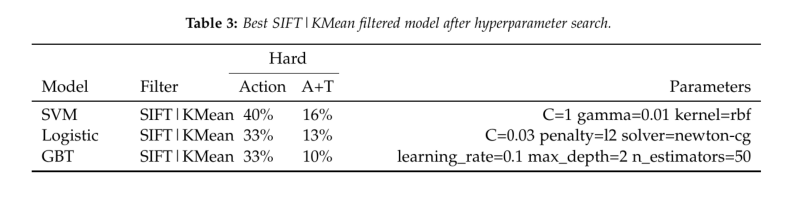

In [35]:
plt.figure(figsize=(10, 20))
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/table_hyper_search.png")

### Error Analysis

#### Convolutional Neural Network

We performed a detailed analysis of the source of error in the hard level dataset based on the results we obtain from the CNN model. Table below shows the accuracy results of the CNN model, which is very high across the board.

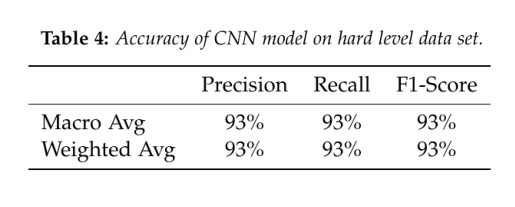

In [25]:
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/table_cnn_accuracy.png")

Figures below shows the f1-score of the model across all labels and the confusion matrix of the "triangle" action labels. We see that there are very few variations among them, however, the "triangle" action does see the lowest f1-score. The confusion matrix clear indicates that the confusion happens mostly within the different types of the "triangle" action.

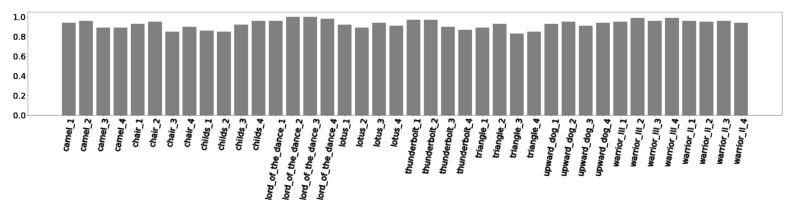

In [34]:
plt.figure(figsize=(10, 20))
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/cnn_f1_scores.png")

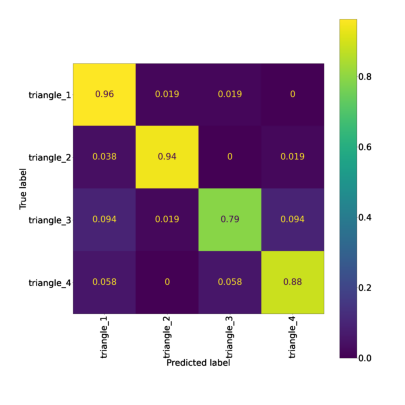

In [39]:
plt.figure(figsize=(10, 5))
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/cnn_confusion.png")

Figure below shows the incorrect predictions made by the CNN model on the "triangle\_3" action and action type combination. Observing these incorrect observations reveal several causes for the errors in prediction. First some angles are difficult for the model to determine what action type is performed as in image 2. Some of the images simply doesn't contain enough of the avatar to result in an accurate prediction, such as image 7, although the model is still able to predict the action label from just an image of the leg.

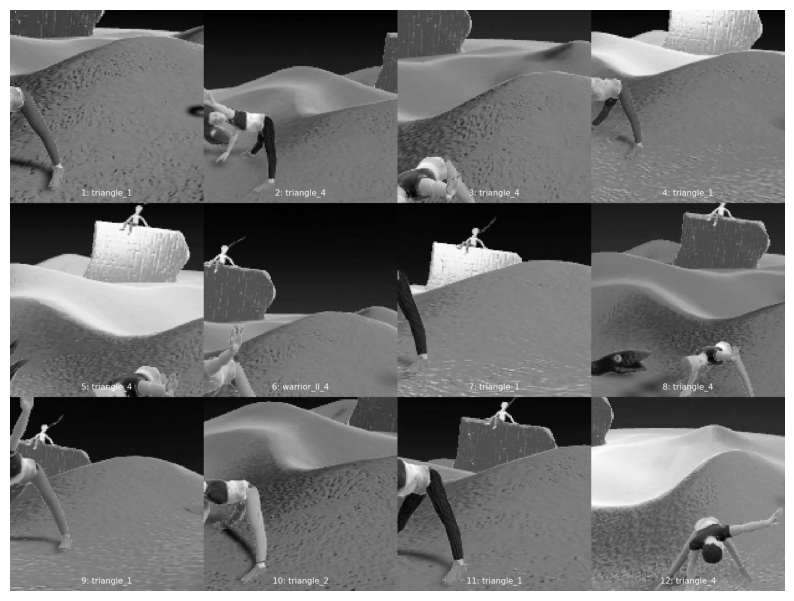

In [41]:
plt.figure(figsize=(10, 10))
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/triangle_fig.png")

#### SVM, Logistic and GBT

Given that the accuracy of the classic models aren't very high on the hard data set, we look at the hyper-parameter searched SVM, Logistic and GBT models with SIFT K-Mean clustered features for error analysis using action plus action type label predictions on the "hard: level data set. Figures below show the confusion matrix of the SVM, logistic and GBT model predictions aggregated to the action labels. We see that the "child" positions are the most accurate category predicted for all three models, while "upward dog" positions are the least accurate, which are very different from the accuracies of the CNN model.

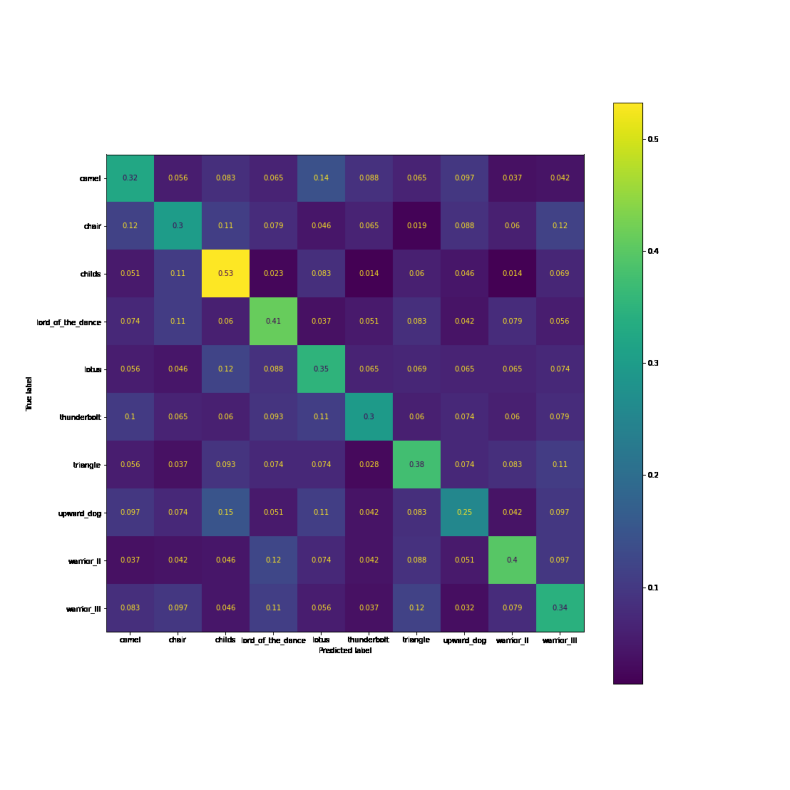

In [44]:
plt.figure(figsize=(10, 10))
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/svm_confusion.png")

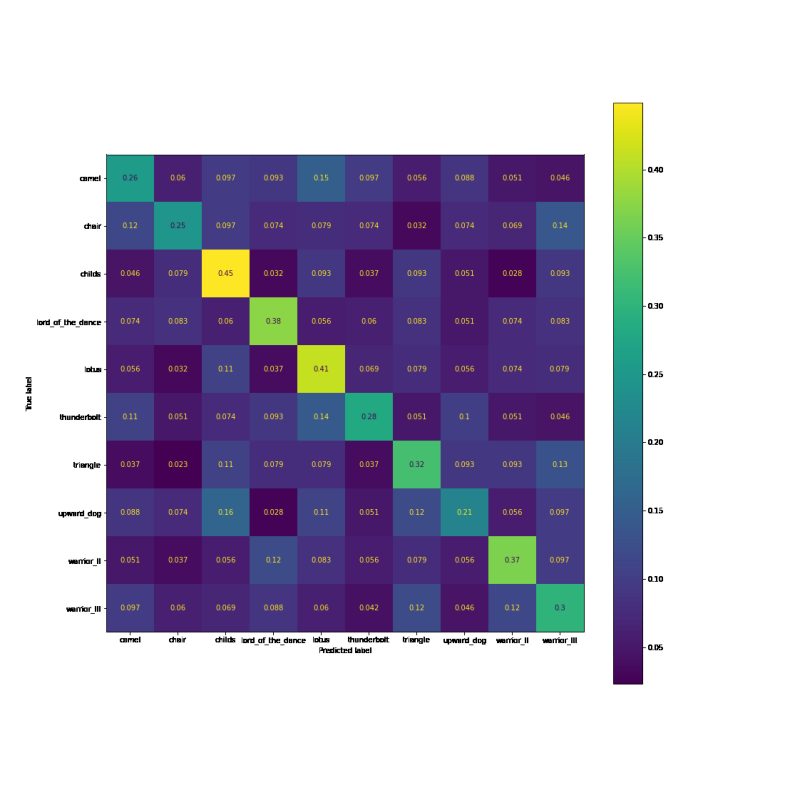

In [45]:
plt.figure(figsize=(10, 10))
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/logistic_confusion.png")

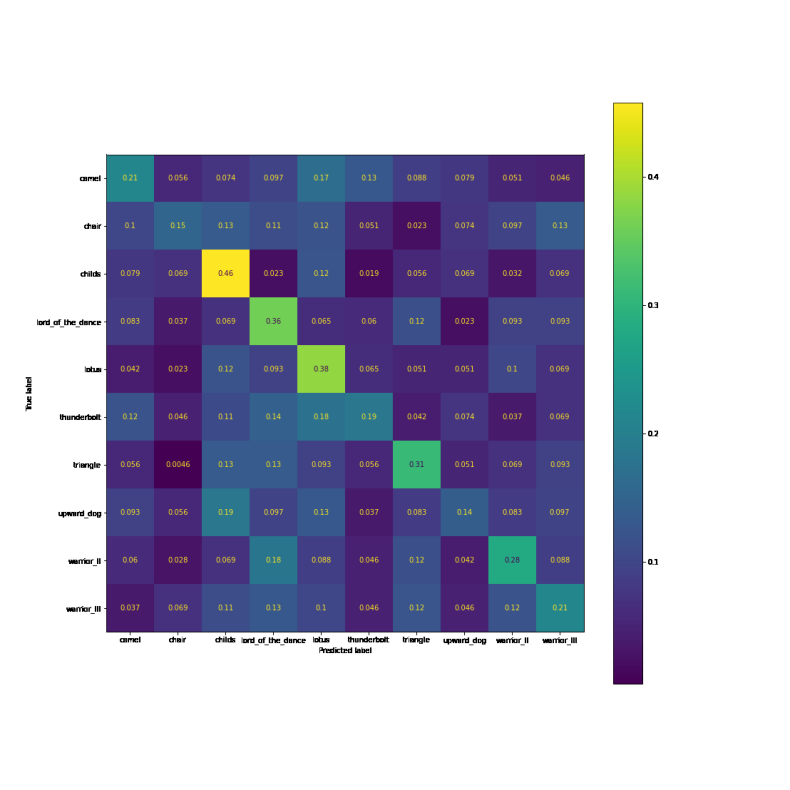

In [46]:
plt.figure(figsize=(10, 10))
display_img("C:/Users/aphri/Documents/t0002/pycharm/repo/nebula/notebook/_data/gbt_confusion.png")

However, considering that the models are still able to classify the samples to action labels with relatively high accuracy, it could be inferred that the models have difficulties recognizing the subtle differences in action types, which is understandable considering the low dimensionalities of the SIFT features.

## Discussion

Our research started out with training three different types of classic image classification models(SVM, Logistic, GBT) in combination with 3 different filtering processes(PCA, HOG, SIFT) using our novel 3-D videos data generation process. The results on the "easy" level data set show that the all three filtering processes show significant improvement over the baseline models without any filtering, demonstrating the abilities of the filters to extract salient features from the images for classifications.

Applying the models on the "medium" level data set shows a more subdued but still respectable model performances on the action labels, yet  it is clear that the classic models has reached their limits trying to distinguish between action types. However, SIFT features are able to help the models achieve higher performance through extracting features that are independent of the background, showcasing its advantages.

Finally, the "hard" level data set results in uniformly poor performance across the classic models, due to increased level of camera orientation difference and additional dynamic background, testing the limits of the SIFT features. Yet the CNN deep learning model is still able to command above 90\% accuracy, unequivocally demonstrating the capabilities of the new technique.

Through this process we demontrated how a flexible and comprehensive 3-D data generation process could tremendously improve our research capability and quality, opening doors to many future research topics. 

## Future

Our work is far from finished. The research results so far is only a starting point, produced in order to showcase what could be possible with the new data generation process. Many topics remain unexplored, some of the immediate next research areas include applying 3D convolutional neural networks on the colored image data, incorporation of optical flow information and applying transformer based model for sequential images embedding and action classification, for both single and sequential actions.

With enhancements to the data simulation engine, we would be able to explore more complex actions and blending of actions. Multiple objects in the scene would allow us to evaluate localized multiple action recognition. Eventually, we could develop a system with the capability to recognize continuous actions for multiple objects within a video data stream.